In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import scipy
from scipy import stats
import gffutils

In [ ]:
#for all genomes 
def create_table (path_to_df_dir, path_to_output) : 
    list_species = []
    list_genomes = []
    for genome in os.scandir(path_to_df_dir) : 
        list_genomes.append(genome.name)
        path_dir= os.path.join(path_to_df_dir,genome.name)
        df = pd.read_csv(os.path.join(path_dir,'df'))
        df_exons = pd.read_csv(os.path.join(path_dir,'df_exons'))
        df_introns = pd.read_csv(os.path.join(path_dir,'df_introns'))
        df_stats = pd.read_csv(os.path.join(path_dir,'df_stats'))
        specie = []
        specie.append(specie_name)
        specie.append(genome_id)
        specie.append(genes_mean_length)
        nb_genes = len(df['gene'].unique())
        specie.append(nb_genes)        
        nb_trancripts = len(df['transcript'].unique())
        specie.append(nb_trancripts)        
        nb_exons = len(df_exons)
        specie.append(nb_exons)        
        specie.append(exons_mean_length)
        exon_ratio = np.mean(df_stats['ratio_exons'])        
        specie.append(exon_ratio) 
        nb_introns = len(df_introns)
        specie.append(nb_introns)   
        specie.append(intron_mean_length)             
        intron_ratio = np.mean(df_stats['ratio_introns'])
        specie.append(intron_ratio)
        list_species.append(specie)
    table_species = pd.DataFrame(list_species, 
                                 columns=('species','genome_id','genes_mean_length','nb_genes','nb_transcripts','nb_exons','exons_mean_length','exon_ratio','nb_introns','introns_mean_length','intron_ratio'), 
                                 index=list_genomes)
    table_species.to_csv(path_to_output)
    return table_species

df=create_table('/home/collot/stage/collot/output_dataframes', '/home/collot/stage/collot/table_species.csv')
print(df)


                  nb_genes  nb_transcripts  nb_exons  nb_introns  \
GCF_000001405.40     23295           89100    310490      286656   
GCF_000951045.1      20267           35562    219920      199898   
GCF_000165445.2      20509           51633    247492      226813   
GCF_000955945.1      20614           55326    250204      229512   
GCF_000181295.1      19558           30386    206967      187603   
GCF_009761245.1      20564           52711    243055      222677   
GCF_007565055.1      21081           47177    245390      224152   
GCF_002776525.5      21528           46545    238949      217735   
GCF_000956065.1      21017           57146    254614      233465   
GCF_001604975.1      21544           47739    234902      213678   
GCF_000951035.1      20103           35756    222236      202249   
GCF_003339765.1      21111           57714    262890      241435   
GCF_000164805.1      20004           30638    188031      169464   
GCF_009828535.3      21733           51899    24

       Unnamed: 0               gene  length  nb_exons  exons_tot_length  \
0               0  gene-LOC138380888       9      1164              9984   
1               1          gene-NEU4       4      1784              5270   
2               2       gene-GAL3ST2       4      1810             11519   
3               3        gene-D2HGDH      13      2000             33762   
4               4          gene-ING5      13      4405             19599   
...           ...                ...     ...       ...               ...   
19509       19509  gene-LOC138380587       5      1163              4507   
19510       19510  gene-LOC138380615      10      1839             16506   
19511       19511  gene-LOC138380639       1      3694              3694   
19512       19512  gene-LOC138380640       2      1273              2846   
19513       19513  gene-LOC138380646       5      1011              4355   

       nb_introns  introns_tot_length  ratio_introns  
0             7.0            109

<Axes: >

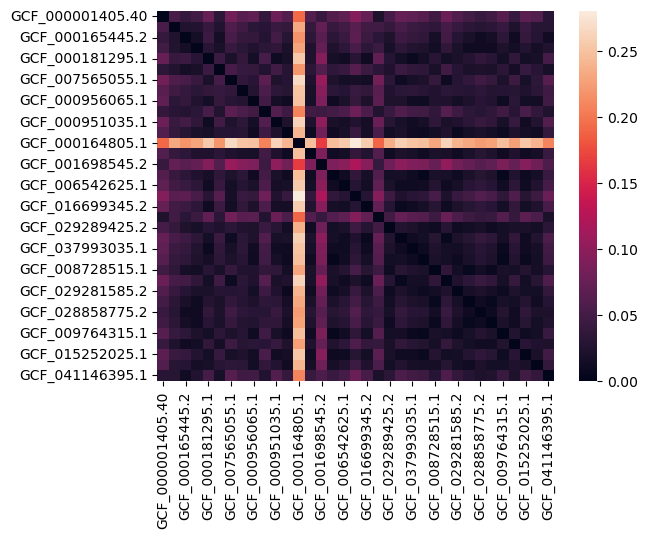

In [7]:
def create_df (path_to_df_dir) : 
    genome_list = []
    df=[]
    for genome in os.scandir(path_to_df_dir) : 
        genome_list.append(genome.name)
    
    for i in range(len(genome_list)): 
        path_dir= os.path.join(path_to_df_dir,genome_list[i])
        df_stats_i = pd.read_csv(os.path.join(path_dir,'df_stats'))
        row = []
        for j in range(len(genome_list)):
            path_dir= os.path.join(path_to_df_dir,genome_list[j])
            df_stats_j = pd.read_csv(os.path.join(path_dir,'df_stats'))
            ks_score = scipy.stats.ks_2samp(df_stats_i['ratio_introns'], df_stats_j['ratio_introns'],nan_policy='omit')
            row.append(ks_score.statistic)
        df.append(row)
    print(df_stats_i)
    df_ks = pd.DataFrame(df, columns=genome_list, index=genome_list)
    return df_ks

df_ks = create_df('/home/collot/stage/collot/output_dataframes')
sns.heatmap(df_ks)

<Axes: >

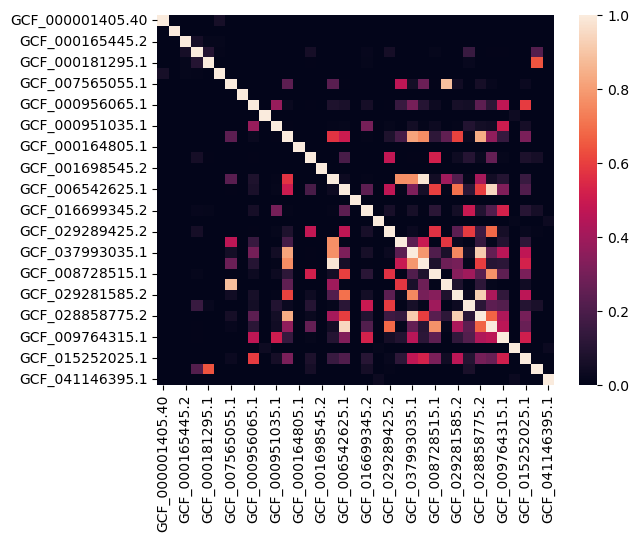

In [ ]:
def create_df (path_to_df_dir) : 
    genome_list = []
    df=[]
    for genome in os.scandir(path_to_df_dir) : 
        genome_list.append(genome.name)
    
    for i in range(len(genome_list)): 
        path_dir= os.path.join(path_to_df_dir,genome_list[i])
        df_stats_i = pd.read_csv(os.path.join(path_dir,'df_stats'))
        row = []
        for j in range(len(genome_list)):
            path_dir= os.path.join(path_to_df_dir,genome_list[j])
            df_stats_j = pd.read_csv(os.path.join(path_dir,'df_stats'))
            ks_score = scipy.stats.ks_2samp(df_stats_i['introns_tot_length'], df_stats_j['introns_tot_length'],nan_policy='omit')
            row.append(ks_score.pvalue)
        df.append(row)
    df_ks = pd.DataFrame(df, columns=genome_list, index=genome_list)
    return df_ks

df_ks = create_df('/home/collot/stage/collot/output_dataframes')


In [ ]:
sns.heatmap(df_ks)